<a href="https://colab.research.google.com/github/uveysturhan/condensed-matter-related/blob/main/Results_for_Harper_Equation_and_Hamiltonian_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

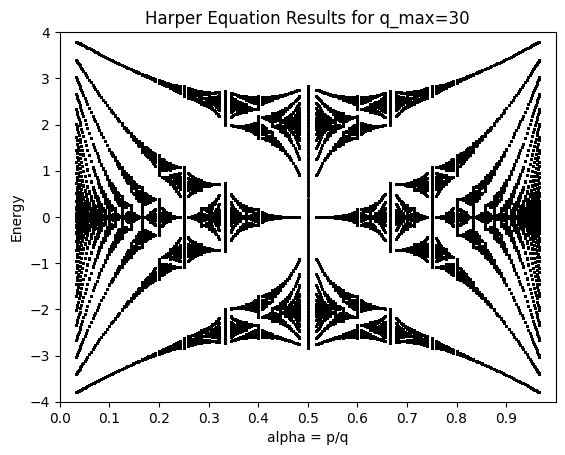

[Fraction(1, 2), Fraction(1, 4), Fraction(3, 4), Fraction(1, 8), Fraction(3, 8), Fraction(5, 8), Fraction(7, 8), Fraction(1, 16), Fraction(3, 16), Fraction(5, 16), Fraction(7, 16), Fraction(9, 16), Fraction(11, 16), Fraction(13, 16), Fraction(15, 16), Fraction(26, 29), Fraction(5, 27), Fraction(19, 25), Fraction(2, 23), Fraction(17, 21), Fraction(5, 19), Fraction(14, 17), Fraction(13, 30), Fraction(14, 15), Fraction(23, 29), Fraction(10, 27), Fraction(4, 13), Fraction(21, 26), Fraction(13, 25), Fraction(4, 23), Fraction(5, 22), Fraction(8, 11), Fraction(13, 21), Fraction(20, 29), Fraction(10, 19), Fraction(1, 18), Fraction(5, 9), Fraction(11, 17), Fraction(7, 25), Fraction(6, 23), Fraction(11, 30), Fraction(13, 15), Fraction(17, 29), Fraction(3, 7), Fraction(13, 14), Fraction(5, 28), Fraction(20, 27), Fraction(19, 28), Fraction(3, 26), Fraction(8, 13), Fraction(15, 19), Fraction(1, 25), Fraction(14, 29), Fraction(8, 23), Fraction(8, 17), Fraction(5, 11), Fraction(21, 22), Fraction(25, 

In [3]:
#Using Harper Equation, lattice size is variable and q x q, where p / q = flux ratio.
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt
#Using the Harper equation, we find the Harper matrix (the Hamiltonian) using the following function.
def find_harper_matrix(q, alpha, kx, ky, t=1.0):
    H = np.zeros((q, q), dtype=np.complex128)
    for n in range(q):
        H[n, n] = -2.0* t * np.cos(kx + 2.0*np.pi*alpha*n) #Diagonal elements in the Harper matrix
        n_plus = (n + 1) % q #Periodic boundary conditions
        H[n, n_plus] += -t #Non-diagonal elements
        H[n_plus, n] += -t #the Hamiltonian is hermitean
    if q==2:
      H[0,q-1]= -t*(1 + np.exp(-1j * q * ky))
      H[q-1,0]= -t*(1 + np.exp(1j * q * ky))
    else:
      H[0,q-1]= -t*(np.exp(-1j * q * ky))
      H[q-1,0]= -t*(np.exp(1j * q * ky))

    return H

#Then, after calculating eigenvalues (energies) of the Hamiltonian, we plot the energies against different rational flux ratio.

def plot_butterfly(q_max=15, kx_samples=150, t=1.0): #We loop over different kx values in the Brillouin zone to get the full spectrum
    alphas_fractions = []
    alphas = []
    energies = []

    for q in range(1 , q_max+1):
      for p in range(1 , q):
        fraction = Fraction(p,q)
        alphas_fractions.append(Fraction(p, q))
    alphas_fractions = list(set(alphas_fractions))

    for alpha in alphas_fractions:
      q = alpha.denominator
      for i in range(-kx_samples, kx_samples+1):
        Hq = find_harper_matrix(q, alpha, np.pi * i / (q*kx_samples), np.pi * i / (q*kx_samples), t=1.0) #Hamiltonian size: (q, q)
        #We find the Hamiltonian for different values of parameters and store the energies and flux ratios in the respective lists.
        eigvals = np.linalg.eigvalsh(Hq)
        alphas.extend([float(alpha)]*len(eigvals))
        energies.extend(eigvals)

    plt.scatter(alphas, energies, s=1, color='black') #We scatter plot the energies against the flux ratio
    plt.xlabel('alpha = p/q')
    plt.ylabel('Energy')
    plt.xticks(np.arange(0,1,0.1))
    plt.title(f'Harper Equation Results for q_max={q_max}')
    plt.xlim(0, 1)
    plt.ylim(-4, 4)
    plt.show()


plot_butterfly(q_max=30, kx_samples=100)
find_harper_matrix(2, 1/2, np.pi/2, np.pi/2)
eigvals = np.linalg.eigvalsh(find_harper_matrix(2, 1/2, 0, 0))
print(eigvals)
#My calculation: E = 2*sqrt(cos^2(kx/2) + cos^2(ky)), -2*sqrt(cos^2(kx/2) + cos^2(ky))= 2*sqrt(2), 2*sqrt(2) = (approx) = 2*1.4, -2*1.4 = 2.8, -2.8

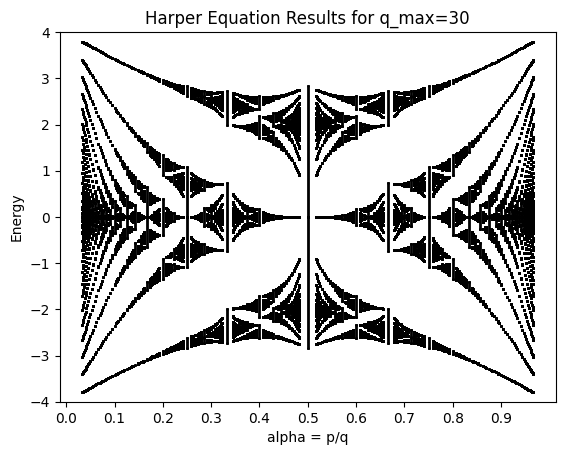

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


In [ ]:
#Using Harper Equation, lattice size is variable and q x q, where p / q = flux ratio.
#In this approach, we find the band edges at (kx,ky)=[(0,0), (pi/q, pi/q)]. (corresponding to minimum and maximum energy) and then draw a line between the edges.
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt
#Using the Harper equation, we find the Harper matrix (the Hamiltonian) using the following function.
def find_harper_matrix(q, alpha, kx, ky, t=1.0):
    H = np.zeros((q, q), dtype=np.complex128)
    for n in range(q):
        H[n, n] = -2.0* t * np.cos(kx + 2.0*np.pi*alpha*n) #Diagonal elements in the Harper matrix
        n_plus = (n + 1) % q #Periodic boundary conditions
        H[n, n_plus] += -t #Non-diagonal elements
        H[n_plus, n] += -t #the Hamiltonian is hermitean
    #employ periodic boundary conditions
    if q==2:
      H[0,q-1]= -t*(1+np.exp(-1j * q * ky))
      H[q-1,0]= -t*(1+np.exp(1j * q * ky))
    else:
      H[0,q-1]= -t*(np.exp(-1j * q * ky))
      H[q-1,0]= -t*(np.exp(1j * q * ky))

    return H

#Then, after calculating eigenvalues (energies) of the Hamiltonian, we plot the energies against different rational flux ratio.
alpha_uniq_check=[]
def plot_butterfly(q_max=15, t=1.0): #We loop over different kx values in the Brillouin zone to get the full spectrum
    for q in range(1 , q_max+1):
      for p in range(1 , q):
        alpha = Fraction(p, q)
        if alpha not in alpha_uniq_check:
          alpha_uniq_check.append(alpha)
          alpha_list = [float(alpha)]*q
          Hq1 = find_harper_matrix(q, float(alpha),0,0, t=1.0) #Hamiltonian size: (q, q)
          Hq2 = find_harper_matrix(q, float(alpha), np.pi / q, np.pi/q, t=1.0) #Hamiltonian size: (q, q)
          #We find the Hamiltonian for different values of parameters and store the energies and flux ratios in the respective lists.
          eigvals1 = np.linalg.eigvalsh(Hq1)
          eigvals2 = np.linalg.eigvalsh(Hq2)
          #eigvals3 = np.linalg.eigvalsh(Hq3)
          for i in range(len(eigvals1)):
              plt.plot([float(alpha), float(alpha)], [eigvals1[i],eigvals2[i]], "-",  c="black", linewidth=2)
              plt.plot(alpha_list, eigvals1, "o", c="black", markersize=0.5)
              plt.plot(alpha_list, eigvals2, "o", c="black", markersize=0.5)
              #plt.plot(alpha_list, eigvals3, "o", c="black", markersize=0.1)
        else:
          pass
    plt.xlabel('alpha = p/q')
    plt.ylabel('Energy')
    plt.xticks(np.arange(0,1,0.1))
    plt.title(f'Harper Equation Results for q_max={q_max}')
    plt.ylim(-4, 4)
    plt.show()
    print(alpha_list)

plot_butterfly(q_max=30)

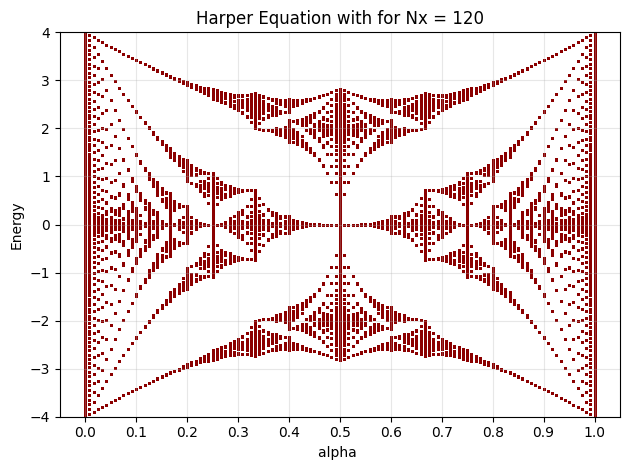

[0.         0.00833333 0.01666667 0.025      0.03333333 0.04166667
 0.05       0.05833333 0.06666667 0.075      0.08333333 0.09166667
 0.1        0.10833333 0.11666667 0.125      0.13333333 0.14166667
 0.15       0.15833333 0.16666667 0.175      0.18333333 0.19166667
 0.2        0.20833333 0.21666667 0.225      0.23333333 0.24166667
 0.25       0.25833333 0.26666667 0.275      0.28333333 0.29166667
 0.3        0.30833333 0.31666667 0.325      0.33333333 0.34166667
 0.35       0.35833333 0.36666667 0.375      0.38333333 0.39166667
 0.4        0.40833333 0.41666667 0.425      0.43333333 0.44166667
 0.45       0.45833333 0.46666667 0.475      0.48333333 0.49166667
 0.5        0.50833333 0.51666667 0.525      0.53333333 0.54166667
 0.55       0.55833333 0.56666667 0.575      0.58333333 0.59166667
 0.6        0.60833333 0.61666667 0.625      0.63333333 0.64166667
 0.65       0.65833333 0.66666667 0.675      0.68333333 0.69166667
 0.7        0.70833333 0.71666667 0.725      0.73333333 0.7416

In [ ]:
#Harper Equation Approach with Fixed Lattice Size
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

def construct_harper_matrix(Nx, alpha, ky, kx):
    H = np.zeros((Nx, Nx), dtype=complex) #Lattice size is fixed

    for n in range(Nx): #we build the harper matrix
        H[n, n] = 2 * np.cos(2 * np.pi * alpha * n + ky)
        if n < Nx - 1:
            H[n, n+1] = 1.0
            H[n+1, n] = 1.0

    H[Nx-1, 0] = np.exp(-1j * kx) #bloch conditions
    H[0, Nx-1] = np.exp(1j * kx)

    return H

def plot_harper_butterfly(Nx, ky_samples=16, kx_samples=16):
    #flux_values = np.linspace(0,1,30)
    flux_values = np.arange(0, Nx+1) / Nx #flux values are chosen such that alpha.Nx=integer.
    #flux_values = np.append(flux_values, 1/3)
    #flux_values = np.linspace(0,1,100)
    ky_values = np.linspace(0, np.pi, ky_samples, endpoint=False)
    kx_values = np.linspace(0, np.pi, kx_samples, endpoint=False)

    all_flux = []
    all_energies = []

    #Loop over flux and momentum values
    for alpha in flux_values:
        for ky in ky_values:
            for kx in kx_values:
                flux_frac = Fraction(alpha)
                flux_denominator = flux_frac.denominator
                if flux_denominator == 0:
                    continue
                H = construct_harper_matrix(Nx, alpha, ky, kx)
                eigvals = np.linalg.eigvalsh(H)
                all_flux.extend([alpha] * len(eigvals))
                all_energies.extend(eigvals)
    plt.scatter(all_flux, all_energies, s=1, color='darkred')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.xlabel('alpha ')
    plt.ylabel('Energy')
    plt.ylim(-4,4)
    plt.title(f'Harper Equation with for Nx = {Nx}')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    print(flux_values)


plot_harper_butterfly(120)

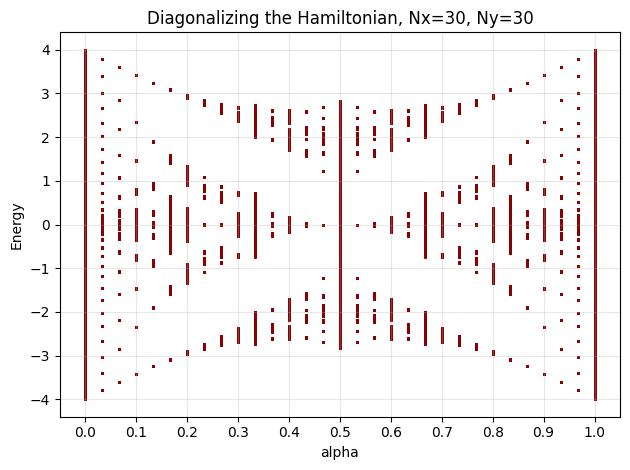

In [ ]:
#In this approach, we directly find the Hamiltonian for a given lattice size.
import numpy as np
import matplotlib.pyplot as plt

def find_hamiltonian_2d(Nx, Ny, alpha, kx=0.0, ky=0.0, t=1.0):
    H = np.zeros((Nx*Ny, Nx*Ny), dtype=np.complex128)
    for n in range(Ny):
        for m in range(Nx):
            i = n * Nx + m

            # x-direction
            m_plus = (m + 1) % Nx
            j = n * Nx + m_plus
            phase_x = 1.0
            if m_plus < m:
                phase_x = np.exp(1j * kx) #boundary(magnetic translation phase)

            H[i, j] = -t * phase_x
            H[j, i] = -t * np.conjugate(phase_x)

            # y-direction
            n_plus = (n + 1) % Ny
            k = n_plus * Nx + m

            hopping_phase_y = np.exp(1j * 2.0 * np.pi * alpha * m)
            boundary_phase_y = 1.0
            if n_plus < n:
                boundary_phase_y = np.exp(1j * ky) #boundary(magnetic translation phase)

            phase_y = hopping_phase_y * boundary_phase_y

            H[i, k] = -t * phase_y
            H[k, i] = -t * np.conjugate(phase_y)

    return H

Nx, Ny = 30, 30
alpha_values = np.arange(0, Nx+1, 1)/Nx #flux values are chosen such that alpha.Nx=integer.

all_alphas = []
all_energies = []

num_kx = 7 #how many momentum values we will use
num_ky = 7

#Loop over momentum and flux values

for alpha in alpha_values:
    for kx_i in range(num_kx):
        for ky_i in range(num_ky):
            kx = 2.0 * np.pi * kx_i / num_kx
            ky = 2.0 * np.pi * ky_i / num_ky
            H = find_hamiltonian_2d(Nx, Ny, alpha, kx=kx, ky=ky)
            eigvals = np.linalg.eigvalsh(H)
            all_alphas.extend([alpha] * len(eigvals))
            all_energies.extend(eigvals)

plt.scatter(all_alphas, all_energies, s=1, color="darkred")
plt.title(f"Diagonalizing the Hamiltonian, Nx={Nx}, Ny={Ny}")
plt.xlabel("alpha")
plt.ylabel("Energy")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


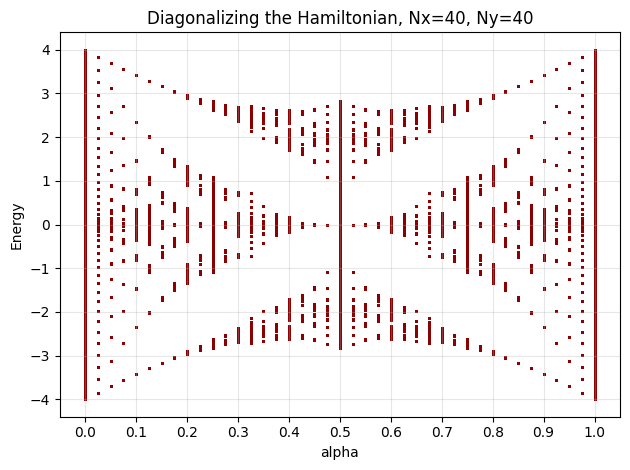

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def find_hamiltonian_2d(Nx, Ny, alpha, kx=0.0, ky=0.0, t=1.0):
    H = np.zeros((Nx*Ny, Nx*Ny), dtype=np.complex128)
    for n in range(Ny):
        for m in range(Nx):
            i = n * Nx + m

            # x-direction
            m_plus = (m + 1) % Nx
            j = n * Nx + m_plus
            phase_x = 1.0
            if m_plus < m:
                phase_x = np.exp(1j * kx)

            H[i, j] = -t * phase_x
            H[j, i] = -t * np.conjugate(phase_x)

            # y-direction
            n_plus = (n + 1) % Ny
            k = n_plus * Nx + m

            hopping_phase_y = np.exp(1j * 2.0 * np.pi * alpha * m)
            boundary_phase_y = 1.0
            if n_plus < n:
                boundary_phase_y = np.exp(1j * ky)

            phase_y = hopping_phase_y * boundary_phase_y

            H[i, k] = -t * phase_y
            H[k, i] = -t * np.conjugate(phase_y)

    return H

Nx, Ny = 40, 40
alpha_values = np.arange(0, Nx+1, 1)/Nx

all_alphas = []
all_energies = []

num_kx = 6
num_ky = 6

for alpha in alpha_values:
    for kx_i in range(num_kx):
        for ky_i in range(num_ky):
            kx = 2.0 * np.pi * kx_i / num_kx
            ky = 2.0 * np.pi * ky_i / num_ky
            H = find_hamiltonian_2d(Nx, Ny, alpha, kx=kx, ky=ky)
            eigvals = np.linalg.eigvalsh(H)
            all_alphas.extend([alpha] * len(eigvals))
            all_energies.extend(eigvals)

plt.scatter(all_alphas, all_energies, s=1, color="darkred")
plt.title(f"Diagonalizing the Hamiltonian, Nx={Nx}, Ny={Ny}")
plt.xlabel("alpha")
plt.ylabel("Energy")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
